In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tellurium as te

import matplotlib.pyplot as plt

In [3]:
os.chdir('..')
os.getcwd()

'c:\\Users\\mkcoo\\Documents\\UW\\GitHub\\ECFERS'

In [4]:
r_biosyn = te.loads('models/240621_VN_Metabolism_Gly_BIOSYN.sbml')

In [5]:
r_biosyn.C00158HCT

0.0

Don't forget to set the base dilution factor initially

In [36]:
def resetsbml(r):
    r.reset()

    r.setValue('init(dilution_factor)',1/200)
    r.C00037 = 1
    r.C00149 = 1
    r.C00022 = 1
    r.C00065 = 1
    r.C00036 = 1
    r.C00018 = 1
    r.C00002 = 1
    r.C00020 = 1
    r.C00120 = 1
    r.C00010 = 1
    r.C00033 = 2
    r.C00158HCT = 10
    r.C00304 = 1
    r.C01328 = 15
    r.C00011 = 10
    r.C00014 = 1
    r.EC11719 = 0.0122
    r.EC11137 = 0.061
    r.EC6411 = 0.0488
    r.EC43117 = 0.0366

    return(r)

In [37]:
def resetsbmldil(r):
    r.reset()

    r.setValue('init(dilution_factor)',0.00375)
    r.C00037 = 1
    r.C00149 = 1
    r.C00022 = 1
    r.C00065 = 1
    r.C00036 = 1
    r.C00018 = 1
    r.C00002 = 1
    r.C00020 = 1
    r.C00120 = 1
    r.C00010 = 1
    r.C00033 = 2
    r.C00158HCT = 10
    r.C00304 = 1
    r.C01328 = 15
    r.C00011 = 10
    r.C00014 = 1
    r.EC11719 = 0.0122
    r.EC11137 = 0.061
    r.EC6411 = 0.0488
    r.EC43117 = 0.0366

    return(r)

In [38]:
def resetsbmlconc(r):
    r.reset()

    r.setValue('init(dilution_factor)',0.00625)
    r.C00037 = 1
    r.C00149 = 1
    r.C00022 = 1
    r.C00065 = 1
    r.C00036 = 1
    r.C00018 = 1
    r.C00002 = 1
    r.C00020 = 1
    r.C00120 = 1
    r.C00010 = 1
    r.C00033 = 2
    r.C00158HCT = 10
    r.C00304 = 1
    r.C01328 = 15
    r.C00011 = 10
    r.C00014 = 1
    r.EC11719 = 0.0122
    r.EC11137 = 0.061
    r.EC6411 = 0.0488
    r.EC43117 = 0.0366

    return(r)

Simulate to obtain the base values for malate production and CO2 production/consumption

In [39]:
r_biosyn = resetsbml(r_biosyn)
base_results = r_biosyn.simulate(0, 8*60*60)
base_mal = base_results['[C00149]'][-1] - base_results['[C00149]'][0]
base_carbon = (base_results['[C00011]'][-1] + base_results['[C00288]'][-1]) - (base_results['[C00011]'][0] + base_results['[C00288]'][0])

Decrease the dilution factor (more dilute)

In [40]:
r_biosyn = resetsbmldil(r_biosyn)

In [41]:
dilute_results = r_biosyn.simulate(0, 8*60*60)
dilute_mal = dilute_results['[C00149]'][-1] - dilute_results['[C00149]'][0]
dilute_carbon = (dilute_results['[C00011]'][-1] + dilute_results['[C00288]'][-1]) - (dilute_results['[C00011]'][0] + dilute_results['[C00288]'][0])

Increase the dilution factor (less dilute)

In [42]:
r_biosyn = resetsbmlconc(r_biosyn)

In [43]:
conc_results = r_biosyn.simulate(0, 8*60*60)
conc_mal = conc_results['[C00149]'][-1] - conc_results['[C00149]'][0]
conc_carbon = (conc_results['[C00011]'][-1] + conc_results['[C00288]'][-1]) - (conc_results['[C00011]'][0] + conc_results['[C00288]'][0])

Decrease the concentration of Fdh

In [44]:
r_biosyn = resetsbml(r_biosyn)
fdhinit = r_biosyn.EC11719
r_biosyn.EC11719 = fdhinit*0.75

In [45]:
lofdh_results = r_biosyn.simulate(0, 8*60*60)
lofdh_mal = lofdh_results['[C00149]'][-1] - lofdh_results['[C00149]'][0]
lofdh_carbon = (lofdh_results['[C00011]'][-1] + lofdh_results['[C00288]'][-1]) - (lofdh_results['[C00011]'][0] + lofdh_results['[C00288]'][0])

Increase the concentration of Fdh

In [46]:
r_biosyn = resetsbml(r_biosyn)
r_biosyn.EC11719 = fdhinit*1.25

In [47]:
hifdh_results = r_biosyn.simulate(0, 8*60*60)
hifdh_mal = hifdh_results['[C00149]'][-1] - hifdh_results['[C00149]'][0]
hifdh_carbon = (hifdh_results['[C00011]'][-1] + hifdh_results['[C00288]'][-1]) - (hifdh_results['[C00011]'][0] + hifdh_results['[C00288]'][0])

Decrease the concentration of HCT

In [48]:
r_biosyn = resetsbml(r_biosyn)
hctinit = r_biosyn.C00158HCT
r_biosyn.C00158HCT = hctinit*0.75

In [49]:
lohct_results = r_biosyn.simulate(0, 8*60*60)
lohct_mal = lohct_results['[C00149]'][-1] - lohct_results['[C00149]'][0]
lohct_carbon = (lohct_results['[C00011]'][-1] + lohct_results['[C00288]'][-1]) - (lohct_results['[C00011]'][0] + lohct_results['[C00288]'][0])

Increase the concentration of HCT

In [50]:
r_biosyn = resetsbml(r_biosyn)
r_biosyn.C00158HCT = hctinit*1.25

In [51]:
hihct_results = r_biosyn.simulate(0, 8*60*60)
hihct_mal = hihct_results['[C00149]'][-1] - hihct_results['[C00149]'][0]
hihct_carbon = (hihct_results['[C00011]'][-1] + hihct_results['[C00288]'][-1]) - (hihct_results['[C00011]'][0] + hihct_results['[C00288]'][0])

Decrease the concentration of all pathway enzymes

In [52]:
r_biosyn = resetsbml(r_biosyn)
sdainit = r_biosyn.EC1442
pycinit = r_biosyn.EC6411
mdhinit = r_biosyn.EC11137

In [53]:
r_biosyn.EC1442 = sdainit*0.75
r_biosyn.EC6411 = pycinit*0.75
r_biosyn.EC11137 = mdhinit*0.75

In [54]:
loenz_results = r_biosyn.simulate(0, 8*60*60)
loenz_mal = loenz_results['[C00149]'][-1] - loenz_results['[C00149]'][0]
loenz_carbon = (loenz_results['[C00011]'][-1] + loenz_results['[C00288]'][-1]) - (loenz_results['[C00011]'][0] + loenz_results['[C00288]'][0])

Increase the concentration of all pathway enzymes

In [55]:
r_biosyn = resetsbml(r_biosyn)
r_biosyn.EC1442 = sdainit*1.25
r_biosyn.EC6411 = pycinit*1.25
r_biosyn.EC11137 = mdhinit*1.25

In [56]:
hienz_results = r_biosyn.simulate(0, 8*60*60)
hienz_mal = hienz_results['[C00149]'][-1] - hienz_results['[C00149]'][0]
hienz_carbon = (hienz_results['[C00011]'][-1] + hienz_results['[C00288]'][-1]) - (hienz_results['[C00011]'][0] + hienz_results['[C00288]'][0])

Decrease the concentration of Serine

In [57]:
r_biosyn = resetsbml(r_biosyn)
serinit = r_biosyn.C00065
r_biosyn.C00065 = serinit*0.75

In [58]:
loser_results = r_biosyn.simulate(0, 8*60*60)
loser_mal = loser_results['[C00149]'][-1] - loser_results['[C00149]'][0]
loser_carbon = (loser_results['[C00011]'][-1] + loser_results['[C00288]'][-1]) - (loser_results['[C00011]'][0] + loser_results['[C00288]'][0])

Increase the concentration of Serine

In [59]:
r_biosyn = resetsbml(r_biosyn)
r_biosyn.C00065 = serinit*1.25

In [60]:
hiser_results = r_biosyn.simulate(0, 8*60*60)
hiser_mal = hiser_results['[C00149]'][-1] - hiser_results['[C00149]'][0]
hiser_carbon = (hiser_results['[C00011]'][-1] + hiser_results['[C00288]'][-1]) - (hiser_results['[C00011]'][0] + hiser_results['[C00288]'][0])

Construct a dataframe with values

In [88]:
col0 = ['[Hyroxycitrate]', '[Pathway Enzymes]', '[Serine]', 'Cofactor Regeneration ([Fdh])', 'Dilution Factor']
col1 = [lohct_mal, loenz_mal, loser_mal, lofdh_mal, dilute_mal]
col2 = [hihct_mal, hienz_mal, hiser_mal, hifdh_mal, conc_mal]

mal_df = pd.DataFrame({
    'Input': col0,
    '-25%': col1,
    '+25%': col2
})

In [89]:
col0 = ['[Hyroxycitrate]', '[Pathway Enzymes]', 'Cofactor Regeneration ([Fdh])', '[Serine]', 'Dilution Factor']
col1 = [lohct_carbon, loenz_carbon, lofdh_carbon, loser_carbon, dilute_carbon]
col2 = [hihct_carbon, hienz_carbon, hifdh_carbon, hiser_carbon, conc_carbon]

carbon_df = pd.DataFrame({
    'Input': col0,
    '-25%': col1,
    '+25%': col2
})

In [90]:
mal_df['-25%'] -= base_mal
mal_df['+25%'] -= base_mal

In [91]:
carbon_df['-25%'] -= base_carbon
carbon_df['+25%'] -= base_carbon

Make a tornado plot for malate

Text(0.5, 1.0, 'Sensitivity of Malate Total Production')

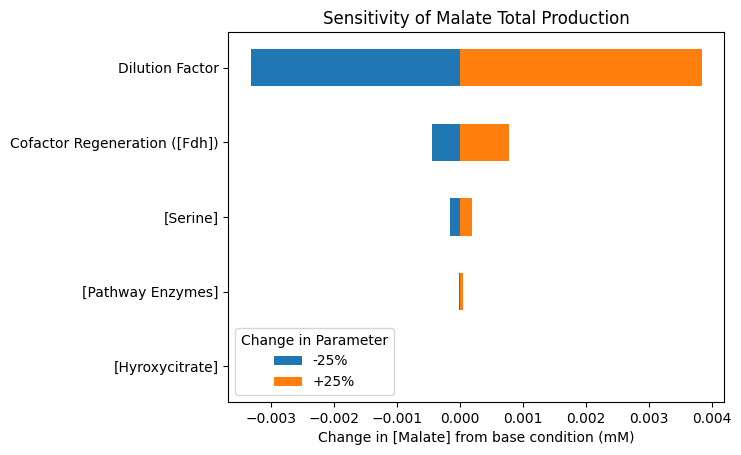

In [99]:
mal_df2 = pd.melt(mal_df, id_vars ='Input', var_name='Change in Parameter', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(mal_df2['Change in Parameter'].unique(),mal_df2.groupby('Change in Parameter')):
    ax.barh(df[1]['Input'], df[1]['change in the output'], height=0.5, label=typ)
ax.legend(title = 'Change in Parameter')  

plt.xlabel('Change in [Malate] from base condition (mM)')
plt.title('Sensitivity of Malate Total Production')

Make a tornado plot for carbon

Text(0.5, 1.0, 'Sensitivity of Carbon Total Production')

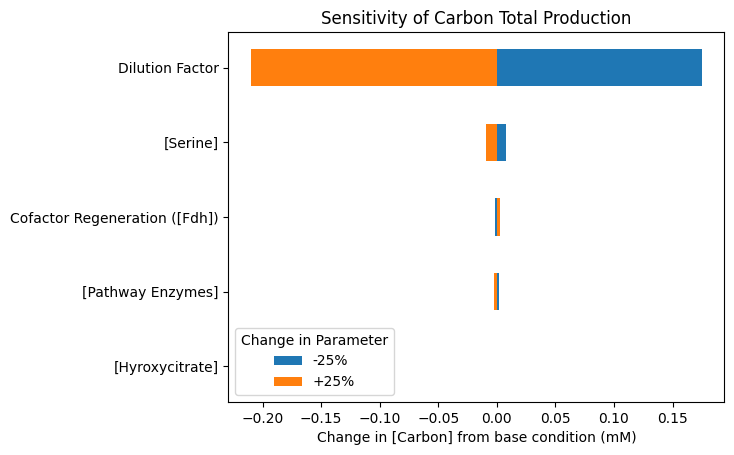

In [100]:
mal_df2 = pd.melt(carbon_df, id_vars ='Input', var_name='Change in Parameter', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(mal_df2['Change in Parameter'].unique(),mal_df2.groupby('Change in Parameter')):
    ax.barh(df[1]['Input'], df[1]['change in the output'], height=0.5, label=typ)
ax.legend(title = 'Change in Parameter')  
plt.xlabel('Change in [Carbon] from base condition (mM)')
plt.title('Sensitivity of Carbon Total Production')